In [1]:
import numpy as np
import scipy as sp
import scipy.integrate
import math
import matplotlib.pyplot as plt
import csv

In [2]:
nx = 512
lx = 9.
dx = lx/nx

ny = 257
ly = 3.036
dy = ly/(ny-1)

xdata = [0.05, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

In [3]:
y = np.loadtxt("yp.dat")

In [4]:
dune = np.zeros(nx)
x = np.zeros(nx)
for i in range(nx):
    x[i] = (i)*dx

y_bump = 0.
for i in range(nx):
    xm = i*dx
    if xm > lx/2.:
        xm = (lx - xm)*28.
    else:
        xm = xm*28.
    if xm >= 0. and xm <= 9.:
        y_bump = min(28.,28+0.006775070969851*xm**2-2.124527775800E-03*xm**3)
    if xm >= 9. and xm <= 14.:
        y_bump= 2.507355893131E+01 + 9.754803562315E-01*xm - 1.016116352781E-01*xm**2 + 1.889794677828E-03*xm**3
    if xm >= 14. and xm <= 20.:
        y_bump = 2.579601052357E+01+ 8.206693007457E-01*xm - 9.055370274339E-02*xm**2 + 1.626510569859E-03*xm**3
    if xm >= 20. and xm <= 30.:
        y_bump = 4.046435022819E+01 - 1.379581654948E+00*xm + 1.945884504128E-02*xm**2 - 2.070318932190E-04*xm**3
    if xm >= 30. and xm <= 40.:
        y_bump = 1.792461334664E+01 + 8.743920332081E-01*xm - 5.567361123058E-02*xm**2 + 6.277731764683E-04*xm**3
    if xm >= 40. and xm <= 54.:
        y_bump = max(0.,5.639011190988E+01 - 2.010520359035E+00*xm + 1.644919857549E-02*xm**2 +2.674976141766E-05*xm**3)

    dune[i] = y_bump

dune = dune / 28.

In [5]:
class Statistics(object):
    def __init__(self,path,chartype):
        if chartype == 'ref':
            self.y = []
            self.U = []
            self.V = []
            self.uu = []
            self.vv = []
            self.uv = []
            self.ww = []
            self.k = []
            self.ub = 1
            self.ub2 = self.ub * self.ub
            for var in range(1,11):
                with open(path+'UFR3-30_C_700_data_MB-'+str(var).zfill(3)+'.dat', 'r') as f:
                    data = list(csv.reader(f, delimiter=' ', skipinitialspace=True,
                                           quoting=csv.QUOTE_NONNUMERIC))
                    data = np.transpose(data)
                    self.y.append(data[0])
                    self.U.append(data[1])
                    self.V.append(data[2])
                    self.uu.append(data[3])
                    self.vv.append(data[4])
                    self.uv.append(data[5])
                    self.k.append(data[6])
                    self.ww.append(2.*data[6]-data[3]-data[4])
                del data
        else:
            self.y = []
            self.U = []
            self.V = []
            self.W = []
            self.uu = []
            self.vv = []
            self.uv = []
            self.ww = []
            self.k = []
            usum = np.zeros((nx,ny))
            name = path + 'usum'  + chartype
            usum = (np.fromfile(name, dtype=np.float64)).reshape((nx, ny), order='FORTRAN')
            vsum = np.zeros((nx,ny))
            name = path + 'vsum'  + chartype
            vsum = (np.fromfile(name, dtype=np.float64)).reshape((nx, ny), order='FORTRAN')
            wsum = np.zeros((nx,ny))
            name = path + 'wsum'  + chartype
            wsum = (np.fromfile(name, dtype=np.float64)).reshape((nx, ny), order='FORTRAN')
            uusum = np.zeros((nx,ny))
            name = path + 'uusum'  + chartype
            uusum = (np.fromfile(name, dtype=np.float64)).reshape((nx, ny), order='FORTRAN')
            vvsum = np.zeros((nx,ny))
            name = path + 'vvsum'  + chartype
            vvsum = (np.fromfile(name, dtype=np.float64)).reshape((nx, ny), order='FORTRAN')
            uvsum = np.zeros((nx,ny))
            name = path + 'uvsum'  + chartype
            uvsum = (np.fromfile(name, dtype=np.float64)).reshape((nx, ny), order='FORTRAN')
            wwsum = np.zeros((nx,ny))
            name = path + 'wwsum'  + chartype
            wwsum = (np.fromfile(name, dtype=np.float64)).reshape((nx, ny), order='FORTRAN')
            ksum = (uusum+vvsum+wwsum)/2.
            nj = int(1./dy)
            self.ub = scipy.integrate.simps(usum[0][nj:-1],y[nj:-1])/(ly-1.)
            self.ub2 = self.ub * self.ub
            print(self.ub)
            for var in xdata:
                ni = int(var/dx)+1
                nj = 0
                while y[nj] < dune[ni]:
                    nj += 1
                self.y.append(y[nj:-1])
                self.U.append(usum[ni,nj:-1])
                self.V.append(vsum[ni,nj:-1])
                self.W.append(wsum[ni,nj:-1])
                self.uu.append(uusum[ni,nj:-1])
                self.vv.append(vvsum[ni,nj:-1])
                self.uv.append(uvsum[ni,nj:-1])
                self.ww.append(wwsum[ni,nj:-1])
                self.k.append(ksum[ni,nj:-1])
            del usum,vsum,wsum,uusum,vvsum,uvsum,wwsum,ksum

In [6]:
simulation = {}

simulation["2.0.1-3-gfe9d09b"] = Statistics('./data/','0400')
simulation["2.0.1-3-gfe9d09b"].color="C0"
simulation["2.0.1-19-ge581871"] = Statistics('./data2/','0400')
simulation["2.0.1-19-ge581871"].color="C2"
simulation["Ref"] = Statistics('./data/','ref')
simulation["Ref"].color="C1"

0.642856243848374
0.6428224245974459


/home/nett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: Non length-one string passed in for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
/home/nett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Non length-one string passed in for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
/home/nett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: DeprecationWarning: Non length-one string passed in for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
/home/nett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: DeprecationWarning: Non length-one string passed in for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
/home/nett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: DeprecationWarning: Non length-one string passed in for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
/home/nett/anaconda3

<Figure size 432x288 with 0 Axes>

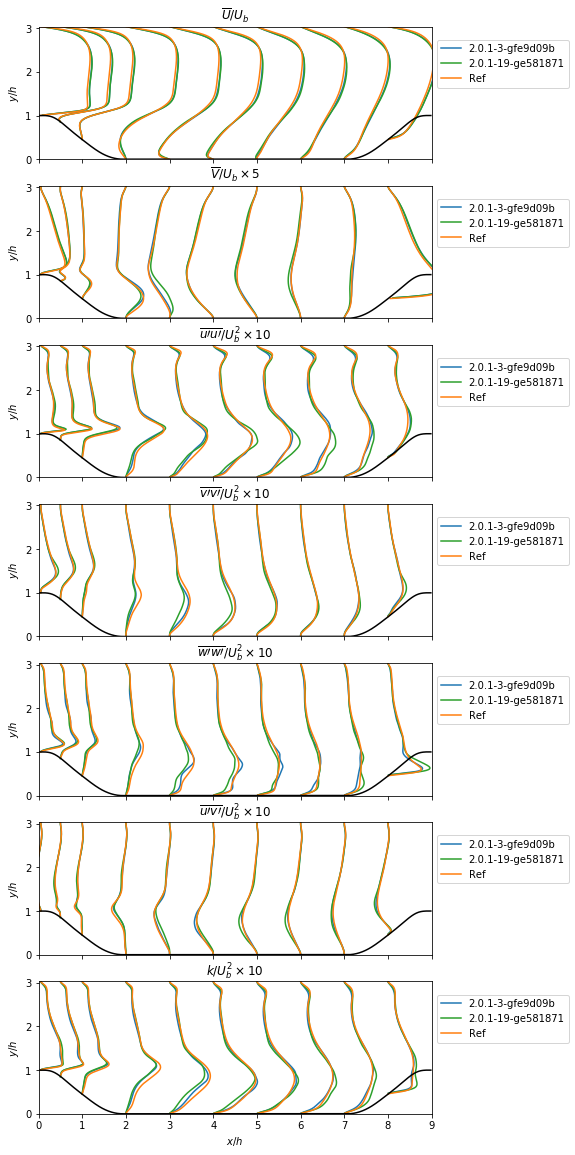

In [7]:
############
# new figure
############

plt.clf()

fig, ax = plt.subplots(7, 1, figsize=(10, 20))

for key, data in simulation.items():
    for i, var in enumerate(xdata):
        if i==0:
            label = key
        else:
            label = ''
        n = int(var/dx)
        ax[0].plot(data.U[i]/data.ub+var,data.y[i],
                   color=data.color, label=label)
        ax[1].plot(data.V[i]*5/data.ub+var,data.y[i],
                   color=data.color, label=label)
        ax[2].plot(data.uu[i]*10/data.ub2+var,data.y[i],
                   color=data.color, label=label)
        ax[3].plot(data.vv[i]*10/data.ub2+var,data.y[i],
                   color=data.color, label=label)
        ax[4].plot(data.ww[i]*10/data.ub2+var,data.y[i],
                   color=data.color, label=label)
        ax[5].plot(data.uv[i]*10/data.ub2+var,data.y[i],
                   color=data.color, label=label)
        ax[6].plot(data.k[i]*10/data.ub2+var,data.y[i],
                   color=data.color, label=label)
label = [r'$\overline{U}/U_b$',
         r'$\overline{V}/U_b \times 5$',
         r'$\overline{u\prime u\prime}/U_b^2 \times 10$',
         r'$\overline{v\prime v\prime}/U_b^2 \times 10$',
         r'$\overline{w\prime w\prime}/U_b^2 \times 10$',
         r'$\overline{u\prime v\prime}/U_b^2 \times 10$',
         r'$k/U_b^2 \times 10$'
        ]

for j,i in enumerate(ax):
    i.set_aspect('equal', adjustable='box')
    i.set_xlim([0.,lx])
    i.set_ylim([0.,ly])
    i.set_title(label[j])
    #i.set_xlabel(r'$x/h$')
    i.set_ylabel(r'$y/h$')
    plt.setp(i.get_xticklabels(), visible=False)
    i.plot(x,dune,color='black')        
    i.legend(loc='lower left', bbox_to_anchor=(1, 0.5))

plt.setp(ax[-1].get_xticklabels(), visible=True)
ax[-1].set_xlabel(r'$x/h$') 
    
plt.savefig('periodic-hill.png', format='png')